## Description

### Objective

Covid-19 pandemic has struck the world for a about 3 years now, eventhough the condition nowadays is getting better because of vaccinations and better knowledge of the disease. Using Covid-19 database which tracks reported cases in real-time, I intend to analyze the dataset that was given. For this assignment, I choose Italy as the country to be analyzed.

### Problem Statement

* Find out which Region/Province is the most impacted by Covid-19.
* Find out the which Region/Province has the most death Covid-19 cases.
* Find out the which Region/Province has the highest Covid-19 fatality rate.

### Dataset

I am using data from Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) which available on Google BigQuery Public Datasets, from table `bigquery-public-data.covid19_jhu_csse_eu.summary`.

In order to retrieves records from database, I use this query:
```
SELECT * 
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
WHERE country_region = "Italy"
ORDER BY date DESC
```
By using this query I manage to return a table where the country is Italy and sort the it by the latest date which data was inputed, and then save the file as (.csv)

## Import Library

Import all the libraries that will be used during data analyzing and processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading & Overview

Load the data into the notebook, then proceed to do some basic overview with data

In [3]:
df = pd.read_csv('h8dsft_P0GC1_Arvin.csv')

In [4]:
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Abruzzo,Italy,2022-11-30,42.351222,13.398438,POINT(13.39843823 42.35122196),606454,3756.0,NaN,NaN,NaN,NaN,"Abruzzo, Italy"
1,Basilicata,Italy,2022-11-30,40.639471,15.805148,POINT(15.80514834 40.63947052),191882,994.0,NaN,NaN,NaN,NaN,"Basilicata, Italy"
2,Calabria,Italy,2022-11-30,38.905976,16.594402,POINT(16.59440194 38.90597598),594197,3114.0,NaN,NaN,NaN,NaN,"Calabria, Italy"
3,Campania,Italy,2022-11-30,40.839566,14.250850,POINT(14.25084984 40.83956555),2338694,11380.0,NaN,NaN,NaN,NaN,"Campania, Italy"
4,Emilia-Romagna,Italy,2022-11-30,44.494367,11.341721,POINT(11.3417208 44.49436681),2023014,18457.0,NaN,NaN,NaN,NaN,"Emilia-Romagna, Italy"


In [5]:
df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
19650,NaN,Italy,2020-02-04,NaN,NaN,NaN,2,0.0,0.0,NaN,NaN,NaN,NaN
19651,NaN,Italy,2020-02-03,NaN,NaN,NaN,2,0.0,0.0,NaN,NaN,NaN,NaN
19652,NaN,Italy,2020-02-02,NaN,NaN,NaN,2,0.0,0.0,NaN,NaN,NaN,NaN
19653,NaN,Italy,2020-02-01,NaN,NaN,NaN,2,0.0,0.0,NaN,NaN,NaN,NaN
19654,NaN,Italy,2020-01-31,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


As seen from the first 5 and last 5 rows, there are so many missing values in the data. Also, now we know the first entry of the data is 31 January 2020.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  19551 non-null  object 
 1   country_region  19655 non-null  object 
 2   date            19655 non-null  object 
 3   latitude        19625 non-null  float64
 4   longitude       19625 non-null  float64
 5   location_geom   19625 non-null  object 
 6   confirmed       19655 non-null  int64  
 7   deaths          19654 non-null  float64
 8   recovered       9511 non-null   float64
 9   active          9461 non-null   float64
 10  fips            0 non-null      float64
 11  admin2          0 non-null      float64
 12  combined_key    19604 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.9+ MB


From this information, there are 13 columns in the table which consists 8 numerical and 5 string datatypes.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,19625.0,43.042554,2.485022,38.115697,41.125596,43.616760,45.434905,4.649933e+01
longitude,19625.0,12.226896,2.654073,7.320149,11.121231,12.388247,13.768136,1.686737e+01
confirmed,19655.0,385877.634393,607055.784073,2.000000,30141.000000,120777.000000,423952.500000,3.918510e+06
deaths,19654.0,5574.319782,7567.614128,0.000000,845.000000,2595.000000,7977.000000,4.366200e+04
recovered,9511.0,79827.393755,131735.102731,0.000000,4641.000000,23925.000000,86807.000000,8.093210e+05
active,9461.0,13616.000423,23016.765164,1.000000,585.000000,3777.000000,12928.000000,1.644060e+05
fips,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admin2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using this function, we might see summarization from numerical datatype columns. 

## Data Cleaning

After doing some overview with the data we have, it is obvious that we have to do some cleaning with the data.

Steps:
* Drop some columns which has no use in this analysis
* Rename columns to make it more readable
* Lastly, handling with missing values which apparent in the data

In [8]:
# Return how many missing value in the data
df.isnull().sum()

province_state      104
country_region        0
date                  0
latitude             30
longitude            30
location_geom        30
confirmed             0
deaths                1
recovered         10144
active            10194
fips              19655
admin2            19655
combined_key         51
dtype: int64

Using this function, it shows that so many columns have missing value. Therefore, it's better to drop some of the columns in the next step, since I might just be using 5 columns out of 13.

### Drop Columns

In [9]:
# Showing the table
df.head(1)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Abruzzo,Italy,2022-11-30,42.351222,13.398438,POINT(13.39843823 42.35122196),606454,3756.0,NaN,NaN,NaN,NaN,"Abruzzo, Italy"


We will drop latitude, longitude,  location_geom, fips, admin2, and combined_key columns because we currently don't need this columns for analysis. We also going to drop recovered and active columns, because these columns contain so many missing values.

In [10]:
# Dropping columns
df.drop(['latitude', 'longitude', 'location_geom', 'recovered', 'active', 'fips', 'admin2', 'combined_key'], axis = 1, inplace = True)

# To show the changes we made
df.head(1)

,province_state,country_region,date,confirmed,deaths
0,Abruzzo,Italy,2022-11-30,606454,3756.0


After using this function, the columns now reduced into just five columns. Which helps us to focus onto the problems we want to solve.

### Rename Columns

Now, we are going to rename the column name to make it more simple and readable.

In [11]:
df.rename(columns = {'province_state' : 'region', 'country_region' : 'country'}, inplace = True)
list(df.columns)

['region', 'country', 'date', 'confirmed', 'deaths']

The province_state column now called region, and country_region column called country.

### Missing Values Handling

As previously shown, we have data which has missing values. In this step we will drop or fill the data that are missing.

In [12]:
# Checking missing value
df.isnull().sum()

region       104
country        0
date           0
confirmed      0
deaths         1
dtype: int64

In [13]:
# Filling missing value
df['region'].fillna('Unknown', inplace = True)
df

,region,country,date,confirmed,deaths
0,Abruzzo,Italy,2022-11-30,606454,3756.0
1,Basilicata,Italy,2022-11-30,191882,994.0
2,Calabria,Italy,2022-11-30,594197,3114.0
3,Campania,Italy,2022-11-30,2338694,11380.0
4,Emilia-Romagna,Italy,2022-11-30,2023014,18457.0
...,...,...,...,...,...
19650,Unknown,Italy,2020-02-04,2,0.0
19651,Unknown,Italy,2020-02-03,2,0.0
19652,Unknown,Italy,2020-02-02,2,0.0
19653,Unknown,Italy,2020-02-01,2,0.0


On region column, there are missing values where the value do not describe from what the region from. In this case I decide to include this data and fill the missing values as 'Unknown', because there is no info from what region this inputed data from.

In [14]:
# Fill missing value on deaths column
df['deaths'].fillna(0, inplace = True)
df

,region,country,date,confirmed,deaths
0,Abruzzo,Italy,2022-11-30,606454,3756.0
1,Basilicata,Italy,2022-11-30,191882,994.0
2,Calabria,Italy,2022-11-30,594197,3114.0
3,Campania,Italy,2022-11-30,2338694,11380.0
4,Emilia-Romagna,Italy,2022-11-30,2023014,18457.0
...,...,...,...,...,...
19650,Unknown,Italy,2020-02-04,2,0.0
19651,Unknown,Italy,2020-02-03,2,0.0
19652,Unknown,Italy,2020-02-02,2,0.0
19653,Unknown,Italy,2020-02-01,2,0.0


On deaths column, the missing value is handled by filling zero (0). The reason behind this is because from what we know that the following data is still 0, so the data might be missing at random.

In [15]:
# Checking if there's still missing values
df.isnull().sum()

region       0
country      0
date         0
confirmed    0
deaths       0
dtype: int64

Now all the missing values has been handled, so we can proceed to explore the data and do some analysis.

## Data Exploration

In [16]:
df['date'] = pd.to_datetime(df['date'])

First, we going to change date column datatype into datetime which will help us when sorting the data

In [17]:
# Doing query to see the latest data of total confrimed and death cases
data1 = df.query("date == '2022-11-30'").groupby('region')[['confirmed', 'deaths']].sum().sort_values(by =['confirmed', 'deaths'], ascending = False)
data1

,confirmed,deaths
region,,
Lombardia,3918510,43662.0
Veneto,2520805,15909.0
Campania,2338694,11380.0
Lazio,2239105,12340.0
Emilia-Romagna,2023014,18457.0
Sicilia,1724294,12298.0
Piemonte,1641401,13712.0
Puglia,1547601,9254.0
Toscana,1514403,11140.0


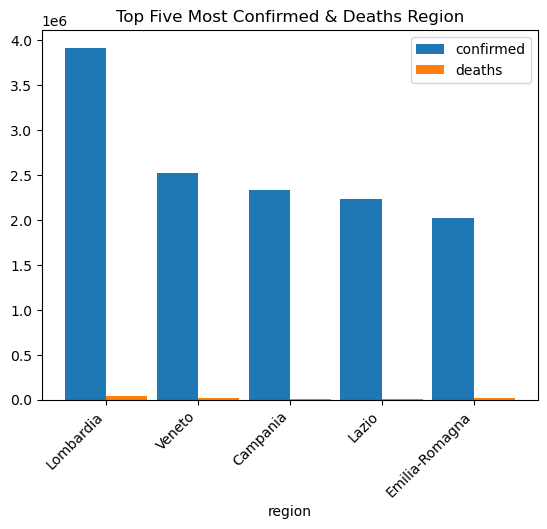

In [42]:
# Use .plot to show the vizualization
data1.head(5).plot(kind = 'bar', width = 0.9, title = 'Top Five Most Confirmed & Deaths Region', legend = True)
plt.xticks(rotation=45, ha='right'); # to rotate label on x axis

We can see the highest confirmed region is Lombardia, by sorting the most confrimed and death case.

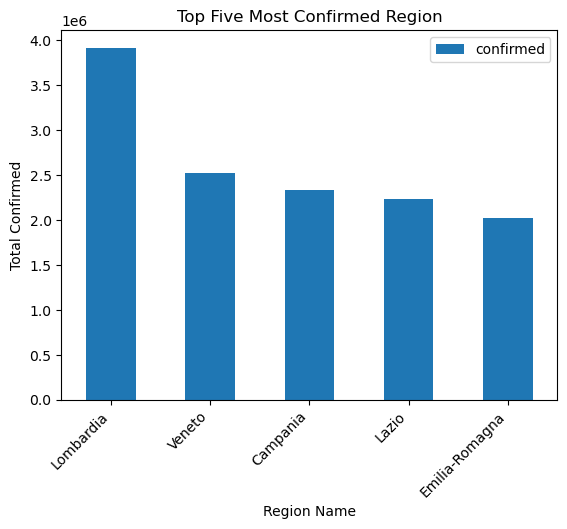

In [19]:
# Query to retrieve only confrimed cases on 30 November 2022
most_region = df.query("date == '2022-11-30'").groupby('region')['confirmed'].sum().sort_values(ascending = False)

# Use .plot to show the vizualization
most_region.head(5).plot(kind = 'bar', xlabel = 'Region Name', ylabel = 'Total Confirmed', title = 'Top Five Most Confirmed Region', legend = True);
plt.xticks(rotation=45, ha='right');


Using the latest data obtained, we visualize top 5 Regions in Italy which have the most confirmed cases ever. Lombardia as the leading Region on the most confrimed cases, followed by Veneto, Campania, Lazio, and Emilia-Romagna.

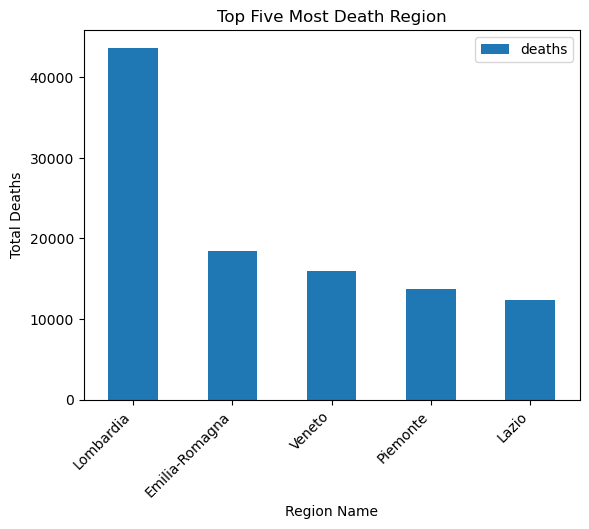

In [20]:
# Query to retrieve only death cases on 30 November 2022
top_death = df.query("date == '2022-11-30'").groupby('region')['deaths'].sum().sort_values(ascending = False)

# Use .plot to show the vizualization
top_death.head(5).plot(kind = 'bar', xlabel = 'Region Name', ylabel = 'Total Deaths', title = 'Top Five Most Death Region', legend = True);
plt.xticks(rotation=45, ha='right');


* Using the latest data obtained, we visualize top 5 Regions in Italy which have the most death cases ever. As seen from the plot above, Lombardia region become the leading region on most death cases followed by Emilia-Romagna, Veneto, Piemonte, and Lazio.

* These result shows that Piemonte region, which is not included on Top five most confirmed cases has the higher death cases compared to another region which has higher confrimed case, except for Lombardia region.

* In order to give more clarity about this finding, we need to calculate the death/confirmed cases, which might show us what region has the highest fatality rate because of covid.

New column has been added, now we can plot which region has the highest fatality rate.

In [21]:
# Create new column to store the fatality rate (deaths/confrimed * 100)
df['fatality_rate'] = df['deaths'] / df['confirmed'] * 100
df = df.round(2)
df.head(10)

,region,country,date,confirmed,deaths,fatality_rate
0,Abruzzo,Italy,2022-11-30,606454,3756.0,0.62
1,Basilicata,Italy,2022-11-30,191882,994.0,0.52
2,Calabria,Italy,2022-11-30,594197,3114.0,0.52
3,Campania,Italy,2022-11-30,2338694,11380.0,0.49
4,Emilia-Romagna,Italy,2022-11-30,2023014,18457.0,0.91
5,Friuli Venezia Giulia,Italy,2022-11-30,542561,5677.0,1.05
6,Lazio,Italy,2022-11-30,2239105,12340.0,0.55
7,Liguria,Italy,2022-11-30,623479,5661.0,0.91
8,Lombardia,Italy,2022-11-30,3918510,43662.0,1.11
9,Marche,Italy,2022-11-30,672388,4196.0,0.62


In [22]:
# Find out more about fatality rate
df.query("region == 'Lombardia' | region == 'Liguria'").groupby(['date', 'region'])['fatality_rate'].agg(['max', 'median', 'min'])

max  median    min
date       region                         
2020-05-14 Liguria    14.77   14.77  14.77
           Lombardia  18.25   18.25  18.25
2020-05-15 Liguria    14.75   14.75  14.75
           Lombardia  18.32   18.32  18.32
2020-05-16 Liguria    14.77   14.77  14.77
...                     ...     ...    ...
2022-11-28 Lombardia   1.11    1.11   1.11
2022-11-29 Liguria     0.91    0.91   0.91
           Lombardia   1.11    1.11   1.11
2022-11-30 Liguria     0.91    0.91   0.91
           Lombardia   1.11    1.11   1.11

[1862 rows x 3 columns]

Fatality rate was higher in the beginning of pandemic, this may be caused by number of death that was higher compared to the confirmed cases. 

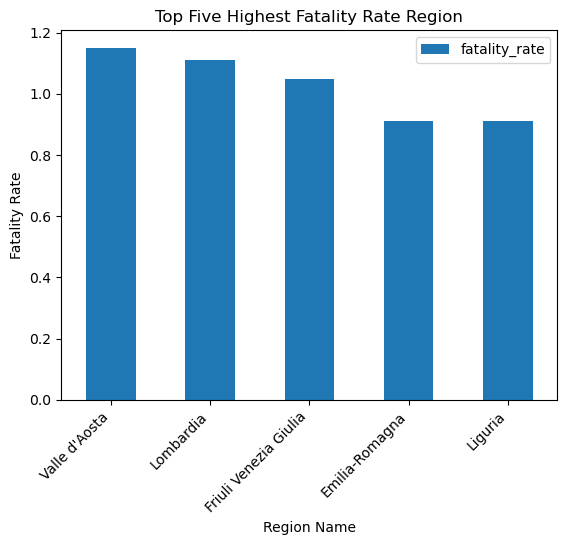

In [23]:
# First, doing query to retrieve the latest data inputed
highest_rate = df.query("date == '2022-11-30'").groupby('region')['fatality_rate'].sum().sort_values(ascending = False)

# Plot the data, to get some insight
highest_rate.head(5).plot(kind = 'bar', xlabel = 'Region Name', ylabel = 'Fatality Rate', title = 'Top Five Highest Fatality Rate Region', legend = True);
plt.xticks(rotation=45, ha='right');

When using this parameter, on 30 November 2022 the highest fatality rate in Italy comes from Valle d'Aosta region which comes as the number one region to have the highest fatality rate, with Lombardia comes as second whereas having the highest total confirmed cases and most deaths in Italy.

## Conclusions

* Based on the latest data, Lombardia is the region with the most total confirmed of Covid-19 followed by Veneto, Campania, Lazio, and Emilia-Romagna.

* Based on the latest data, Lombardia is the region with the most total deaths of Covid-19 followed by Emilia-Romagna, Veneto, Piemonte, and Lazio.

* However, Valle d'Aosta region is the most impacted region of Covid-19, having the highest fatality rate in Italy with much lower total confirmed cases compared to Lombardia region. 

* This situation might be caused of different level of health infrastructure and perharps older poppulation contribute to this situation.

* We could also see that the condition has become increasingly better in Italy, when the fatality rate as of this notebook written is so much lower than in early stage of pandemic.